# Single Parent Population
## Second Try
### 99/08/06

changing child numbers distribution. How does evolution changes for different initial population? time and probability of extinction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Gamma distribution for number of childeren
The distrbution is continuum and changing parameters k, $\theta$ doesn't make sense!

In [2]:
#assumptions
#gamma distribution
k = 0.5
theta = 1


#first generation population
n = 100

#new generation
n_next  = 0
inf_num = 0

for i in range(n):
    inf_num = int(np.random.gamma(k, theta, 1))
    #logic range
    if inf_num < 10:
        n_next += inf_num
            
print(n_next)

18


In [3]:
#Gamma distribution assumption

def gamma_next_gen(n, k, theta):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.gamma(k, theta, 1))
        #logic range
        if inf_num < 10:
            n_next +=inf_num
    return n_next

Text(0.5, 1.0, 'PP for 20 generation averaged on 100 samples for 10000.0 as initial population\n Using gamma distribution')

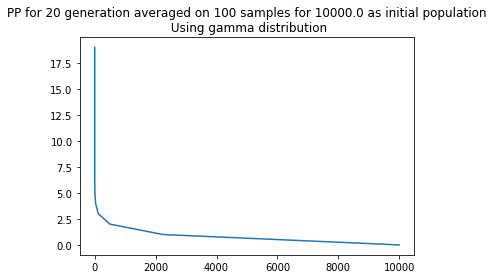

In [4]:
x = 20
T = np.arange(x)
pop = np.zeros(x)
pop[0] = 10000

ave = 100
ns = np.zeros(ave)


for t in range((x-1)):
    for i in range(ave):
        ns[i] = gamma_next_gen(int(pop[t]), k, theta)
    pop[t+1] = np.mean(ns)
    
plt.plot(pop, T)
plt.title("PP for {} generation averaged on {} samples for {} as initial population\n Using gamma distribution".format(x, ave, pop[0]))

### Geometric distribution

In [5]:
#Geometric distribution assumption

def geo_next_gen(n, p):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.geometric(p, 1))
        #logic range
        if inf_num < 10:
            n_next +=inf_num
    return n_next

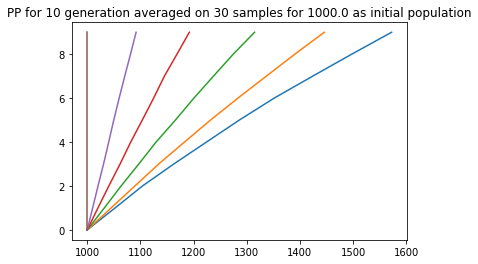

In [129]:
#for different p values
for p in np.arange(0.95, 1, 0.01):
    x = 10
    T = np.arange(x)
    pop = np.zeros(x)
    pop[0] = 1000

    ave = 30
    ns = np.zeros(ave)


    for t in range((x-1)):
        for i in range(ave):
            ns[i] = geo_next_gen(int(pop[t]), p)
        pop[t+1] = np.mean(ns)

    plt.plot(pop, T, label = 'p = {}'.format(p))
    plt.title("PP for {} generation averaged on {} samples for {} as initial population".format(x, ave, pop[0]))
    


It is increasing for all values of p.... It seems the distribution is not suitable.

### Special Distribution

In [49]:
#make a distribution function

def inf_dist(p):
    x = random.random()
    if   x < p[0]:
        return 0
    elif x < p[1]:
        return 1
    elif x < p[2]:
        return 2
    elif x < p[3]:
        return
    
    
#p in an array which presents the probability to have i childeren

In [63]:
print(inf_dist(p))

None


In [8]:
def arbitrary_next_gen(n, p):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = inf_dist(p)
        n_next = n_next + inf_num
    return int(n_next)

In [10]:
x = 20
T = np.arange(x)
pop = np.zeros(x)
pop[0] = 10000

ave = 100
ns = np.zeros(ave)

p = [0.4, 0.4, 0.15, 0.02, 0.01, 0.01, 0.05, 0.05, 0, 0]

for t in range((x-1)):
    for i in range(ave):
        ns[i] = arbitrary_next_gen(int(pop[t]), p)
    pop[t+1] = np.mean(ns)
    
plt.plot(pop, T)
plt.title("PP for {} generation averaged on {} samples for {} as initial population\n Using gamma distribution".format(x, ave, pop[0]))

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

### The previous code with gaussian distribution; Looking for N variation affects

In [6]:
#gaussian distribution assumption

def normal_next_gen(n, inf_av, inf_s):
    n_next  = 0
    inf_num = 0

    for i in range(n):
        inf_num = int(np.random.normal(inf_av, inf_s, 1))
        #be careful about negetive values!!
        if inf_num > 0:
            n_next += inf_num
    return n_next

Wall time: 0 ns


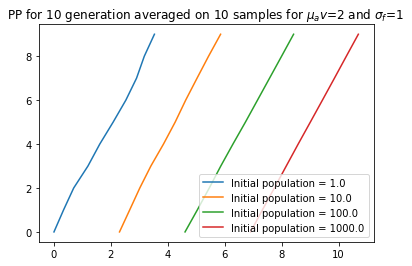

In [100]:
%time

inf_av = 2
inf_s  = 1


for i in range(4):
    x = 10
    T = np.arange(x)
    pop = np.zeros(x)
    pop[0] = 10 ** i

    ave = 10
    ns = np.zeros(ave)


    for t in range((x-1)):
        for i in range(ave):
            ns[i] = normal_next_gen(int(pop[t]), inf_av, inf_s)
        pop[t+1] = np.mean(ns)

    plt.plot(np.log(pop), T, label = 'Initial population = {}'.format(pop[0]))
    plt.title("PP for {} generation averaged on {} samples for $\mu_av$={} and $\sigma_f$={} ".format(x, ave, inf_av, inf_s))
    
plt.legend()
    

### critical value of mean inf_num

Wall time: 7.74 s


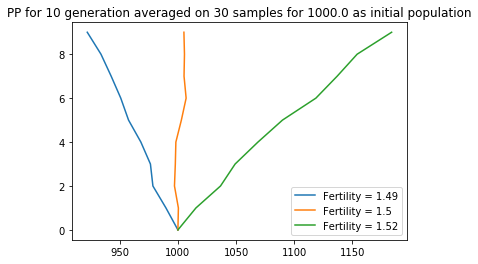

In [101]:
%%time

inf_s = 0.5

for inf_av in [1.49, 1.5, 1.52]:
    x = 10
    T = np.arange(x)
    pop = np.zeros(x)
    pop[0] = 1000

    ave = 30
    ns = np.zeros(ave)


    for t in range((x-1)):
        for i in range(ave):
            ns[i] = normal_next_gen(int(pop[t]), inf_av, inf_s)
        pop[t+1] = np.mean(ns)

    plt.plot(pop, T, label = 'Fertility = {}'.format(inf_av))
    plt.title("PP for {} generation averaged on {} samples for {} as initial population".format(x, ave, pop[0]))
    
plt.legend()

Wall time: 8.07 s


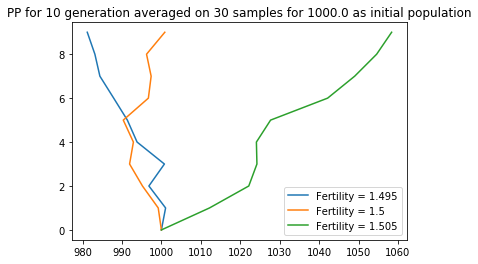

In [131]:
%%time

for inf_av in [1.495, 1.5, 1.505]:
    x = 10
    T = np.arange(x)
    pop = np.zeros(x)
    pop[0] = 1000

    ave = 30
    ns = np.zeros(ave)


    for t in range((x-1)):
        for i in range(ave):
            ns[i] = normal_next_gen(int(pop[t]), inf_av, inf_s)
        pop[t+1] = np.mean(ns)

    plt.plot(pop, T, label = 'Fertility = {}'.format(inf_av))
    plt.title("PP for {} generation averaged on {} samples for {} as initial population".format(x, ave, pop[0]))
    
plt.legend()

### Extinction time

Wall time: 936 ms


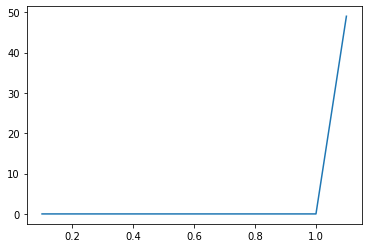

In [117]:
%%time

inf_mat = [0.1, 0.2, 0.5, 0.9, 1, 1.1]
inf_s   = 0.5

for m in range(np.size(inf_mat)):
    inf_av = inf_mat[m]
    x = 50
    T = np.arange(x)
    pop = np.zeros(x)
    t_c = np.zeros(np.size(inf_mat))
    pop[0] = 1000

    ave = 10
    ns = np.zeros(ave)

    for t in range((x-1)):
        for i in range(ave):
            ns[i] = normal_next_gen(int(pop[t]), inf_av, inf_s)
        pop[t+1] = np.mean(ns)
        if pop[t+1] < 1:
            t_c[m] = (t+1)
            
#     if pop[x-2] > 1:
#         t_c[m] = x-1
            
            
#     plt.plot(pop, T, label = 'Fertility = {}'.format(inf_av))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population".format(x, ave, pop[0]))

plt.plot(inf_mat, t_c)
#plt.legend()

Wall time: 10.8 s


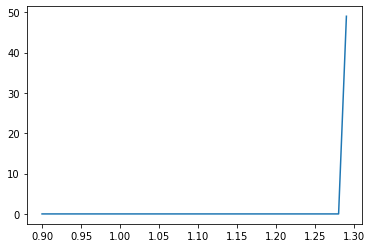

In [122]:
%%time

inf_mat = np.arange(0.9, 1.3, 0.01)
inf_s   = 0.5

for m in range(np.size(inf_mat)):
    inf_av = inf_mat[m]
    x = 50
    T = np.arange(x)
    pop = np.zeros(x)
    t_c = np.zeros(np.size(inf_mat))
    pop[0] = 1000

    ave = 10
    ns = np.zeros(ave)

    for t in range((x-1)):
        for i in range(ave):
            ns[i] = next_gen(int(pop[t]), inf_av, inf_s)
        pop[t+1] = np.mean(ns)
        if pop[t+1] < 1:
            t_c[m] = (t+1)
            
#     if pop[x-2] > 1:
#         t_c[m] = x-1
            
            
#     plt.plot(pop, T, label = 'Fertility = {}'.format(inf_av))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population".format(x, ave, pop[0]))

plt.plot(inf_mat, t_c)
#plt.legend()

Wall time: 2min 22s


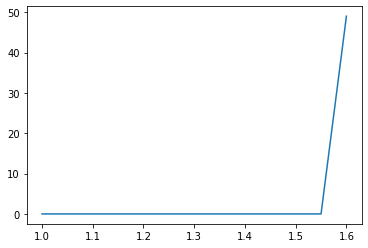

In [126]:
%%time

inf_mat = np.arange(1, 1.6, 0.05)
inf_s   = 0.5

for m in range(np.size(inf_mat)):
    inf_av = inf_mat[m]
    x = 50
    T = np.arange(x)
    pop = np.zeros(x)
    t_c = np.zeros(np.size(inf_mat))
    pop[0] = 1000

    ave = 10
    ns = np.zeros(ave)

    for t in range((x-1)):
        for i in range(ave):
            ns[i] = next_gen(int(pop[t]), inf_av, inf_s)
        pop[t+1] = np.mean(ns)
        if pop[t+1] < 1:
            t_c[m] = (t+1)
            
    if pop[x-2] > 1:
        t_c[m] = x-1
            
            
#     plt.plot(pop, T, label = 'Fertility = {}'.format(inf_av))
#     plt.title("PP for {} generation averaged on {} samples for {} as initial population".format(x, ave, pop[0]))

plt.plot(inf_mat, t_c)
#plt.legend()